In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree # to classification tree
from sklearn.model_selection import train_test_split # to split the data
from sklearn.model_selection import cross_val_score # fro cross validation
from sklearn.metrics import confusion_matrix # to create confusion matris
from sklearn.metrics import plot_confusion_matrix # to plot confusion matrix

# Import the data

In [6]:
# read the dataframe
df = pd.read_csv("processed.cleveland.data", header = None)

In [7]:
df.head() # first five rows of the data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
column_names = ['age',
               'sex',
               'cp',
               'trestbps',
               'chol',
               'fbs',
               'restecg',
               'thalach',
               'exang',
               'oldpeak',
               'slope',
               'ca',
               'thal',
               'hd']
df.columns = column_names
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Identifying Missing Data

In [11]:
df.dtypes # check the data type of the columns

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

In [12]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [14]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

## Handling Missing Data

In [18]:
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

6

In [19]:
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [20]:
len(df)

303

In [33]:
# slecting the columns which donot contain missing values
df_no_missing = df.loc[(df['ca'] != '?') 
                       &
                      (df['thal'] != '?')]

In [34]:
len(df_no_missing)

297

In [35]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [36]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

# Split the data into Train and Test

In [37]:
X = df_no_missing.drop('hd', axis=1).copy() # feature dataset
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [42]:
y = df_no_missing['hd'].copy() # Target Variable
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [43]:
y.unique()

array([0, 2, 1, 3, 4])

In [44]:
X.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
dtype: object

In [45]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [47]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [48]:
X_encoded = pd.get_dummies(X, columns=['cp',
                                      'restecg',
                                      'slope',
                                      'thal'])

X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [49]:
y.unique()

array([0, 2, 1, 3, 4])

In [51]:
y_not_zero_index = y > 0
y[y_not_zero_index] = 1
y.unique()

array([0, 1])

# Build A Preliminary Classification Tree

In [53]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

dt_clf = DecisionTreeClassifier() # initializing the classifier
dt_clf.fit(X_train, y_train) # fitting the classifier to the training data

DecisionTreeClassifier()

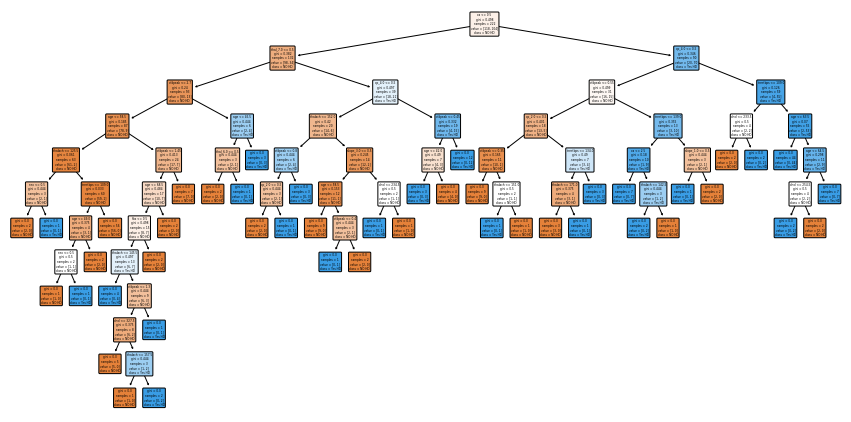

In [60]:
plt.figure(figsize=(15, 7.5))
plot_tree(dt_clf,
         filled = True,
         rounded = True,
         class_names = ["NO HD", "Yes HD"],
         feature_names = X_encoded.columns);

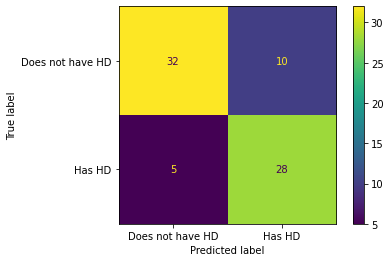

In [61]:
# confusion matrix
plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

# Cost Complexity Pruning Part 1: Visualize alpha

In [65]:
path = dt_clf.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha it is just root tree for the max alpha value

dt_clfs = [] # create the array that we will put decision trees into

for ccp_alpha  in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    dt_clf.fit(X_train, y_train)
    dt_clfs.append(dt_clf)

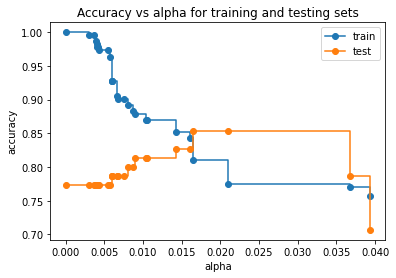

In [76]:
train_scores = [dt_clf.score(X_train, y_train) for dt_clf in dt_clfs]
test_scores = [dt_clf.score(X_test, y_test) for dt_clf in dt_clfs]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()

# Cross Validation For Finding the Best Alpha

<AxesSubplot:xlabel='tree'>

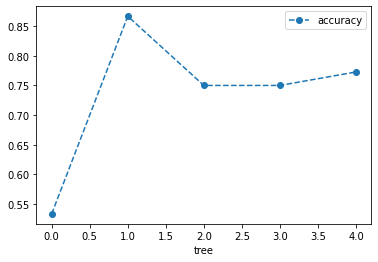

In [78]:
dt_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

scores = cross_val_score(dt_clf, X_train, y_train, cv = 5)
df = pd.DataFrame(data={'tree':range(5),'accuracy':scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<AxesSubplot:xlabel='alpha'>

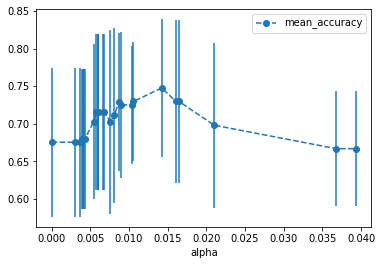

In [82]:
# array to store the results of each fold during cross validation
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha = ccp_alpha)
    scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values,
                            columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                  y='mean_accuracy',
                  yerr='std',
                  marker='o',
                  linestyle='--')

In [83]:
alpha_results[(alpha_results['alpha'] > 0.014)
             &
             (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
21,0.014225,0.747778,0.091395


In [97]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014)
                               &
                               (alpha_results['alpha'] < 0.015)]['alpha']

ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

# Building, Evaluating, Drawing, and Interpreting the Fina Classification Tree

In [99]:
dt_clf_pruned = DecisionTreeClassifier(random_state=42,
                                      ccp_alpha = ideal_ccp_alpha)

dt_clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.014224751066856332, random_state=42)

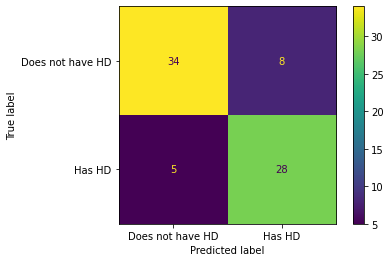

In [100]:
plot_confusion_matrix(dt_clf_pruned, X_test, y_test,
                     display_labels = ['Does not have HD', 'Has HD'])

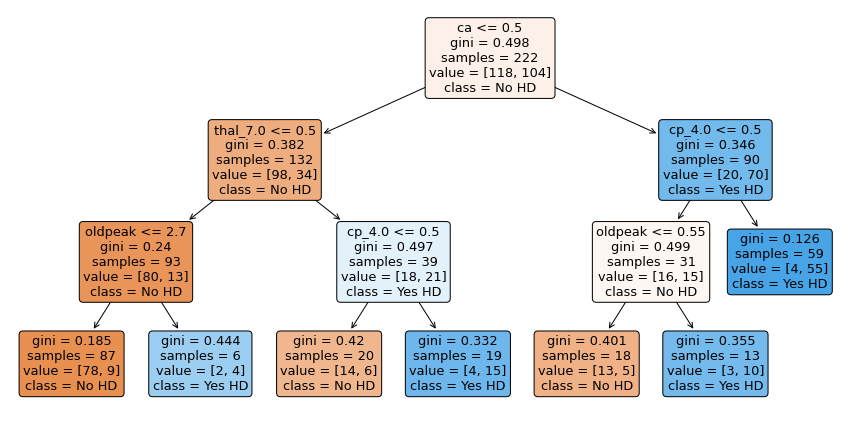

In [103]:
plt.figure(figsize = (15, 7.5))
plot_tree(dt_clf_pruned,
         filled = True,
         rounded = True,
         class_names = ['No HD', 'Yes HD'],
         feature_names = X_encoded.columns);